# **Analisis Sentimen Ulasan Aplikasi BNI Mobile Banking pada googleplaystore menggunakan model Naive Bayes Classifier dan SVM**

In [3]:
# Mengimpor library re (Regular Expression) bawaan Python untuk pencocokan pola teks 
import re 
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## **Scrapping Data**

In [1]:
pip install google-play-scraper
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [2]:
from google_play_scraper import app 

In [1]:
# Mengimpor library re (Regular Expression) bawaan Python untuk pencocokan pola teks 
import re 
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [6]:
# Mengimpor fungsi 'Sort' dan 'reviews' dari google-play-scraper 
# 'Sort' digunakan untuk menentukan urutan ulasan (misalnya terbaru atau rating tertinggi) 
# 'reviews' digunakan untuk mengambil ulasan aplikasi dari Google Play Store 
from google_play_scraper import Sort, reviews

In [8]:
from google_play_scraper import app

# Cek metadata aplikasi
app_info = app('src.com.bni')
print(app_info)

{'title': 'BNI Mobile Banking', 'description': 'The demands for speed and ease of making banking continued to innovate, has come BNI Mobile Banking is more fresh, user friendly and has many new features.\r\n\r\nBNI Mobile Banking is a banking service facility that allows you to transact directly through your smartphone, is safe, easy, and fast. BNI Mobile Banking provides balance information transaction transactions, transfers, telephone bill payments, credit card payments, flight ticket payments, credit purchases, opening a Taplus account, opening a Deposit account, etc. BNI Mobile Banking can also be activated and used for transactions abroad.\r\n\r\nThe latest BNI Mobile Banking application can be found on Google Play with a minimum version 3.0.0 and can be accessed by Android with a minimum version 5.0.0 (Lollypop)\r\n\r\nFor customers who want to use BNI BNI Mobile Banking can visit the nearest branch to register, for the next activation at BNI Mobile Banking application in the fo

In [10]:
result, continuation_token = reviews( 
    'src.com.bni',                 # ID aplikasi BNI Mobile Banking di Google Play Store 
    lang='id',                          # Language of the reviews: English 
    country='id',                       # Location of the reviews: Indonesia 
    sort=Sort.NEWEST,                   # Reviews sorted from the newest 
    count=50000,                       # Maximum number of reviews to retrieve (up to 500,000 reviews) 
    filter_score_with=None              # No filter for scores (retrieve all review scores) 
)

In [11]:
df = pd.DataFrame(np.array(result), columns=['review'])

In [12]:
df.head()

,review
0,{'reviewId': 'cdd17ea1-754c-4b0a-9157-163d0c62...
1,{'reviewId': '05338dcd-c3d6-45fc-99a9-21078161...
2,{'reviewId': 'ee18643f-dd39-41f0-82f8-90dee946...
3,{'reviewId': 'cddcafd6-b750-4058-8e0e-805b3df7...
4,{'reviewId': 'd6e69de3-4b57-4aaa-b824-94f0b0ab...


In [13]:
print(result[:3])  # Menampilkan 5 elemen pertama

[{'reviewId': 'cdd17ea1-754c-4b0a-9157-163d0c62b8dc', 'userName': 'Pengguna Google', 'userImage': 'https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g', 'content': 'setiap kirim otp di sms /wa di imail saya g ada', 'score': 5, 'thumbsUpCount': 0, 'reviewCreatedVersion': None, 'at': datetime.datetime(2025, 1, 14, 8, 48, 58), 'replyContent': 'Hai Kak Nuril, maaf atas kendalanya. Pastikan:\n1. Email terdaftar sesuai\n2. Cek folder spam, trash, & junk (semua folder)\n3. Email aktif & tidak penuh\n4. Nomor HP yg terdaftar Mobile Banking sama dengan nomor WhatsApp. Aktifin verifikasi 2 langkah: - Setting/Pengaturan - Account/Akun - Two step verification/ Verifikasi dua langkah. Tks -CX Izzati-', 'repliedAt': datetime.datetime(2025, 1, 12, 13, 43, 24), 'appVersion': None}, {'reviewId': '05338dcd-c3d6-45fc-99a9-21078161aeb3', 'userName': 'Pengguna Google', 'userImage': 'https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJq

In [18]:
# Kemudian DataFrame asli diperbarui dengan menambahkan kolom-kolom ini 
df = df.join(pd.DataFrame(df.pop('review').tolist())) 

In [20]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,cdd17ea1-754c-4b0a-9157-163d0c62b8dc,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,setiap kirim otp di sms /wa di imail saya g ada,5,0,None,2025-01-14 08:48:58,"Hai Kak Nuril, maaf atas kendalanya. Pastikan:...",2025-01-12 13:43:24,None
1,05338dcd-c3d6-45fc-99a9-21078161aeb3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Cakep,5,0,None,2025-01-14 08:26:24,None,NaT,None
2,ee18643f-dd39-41f0-82f8-90dee9465736,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,memuaskan,5,0,5.15,2025-01-14 08:16:42,None,NaT,5.15
3,cddcafd6-b750-4058-8e0e-805b3df78cc4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sangat membantu dalam bertransaksi,5,0,5.15,2025-01-14 08:03:46,None,NaT,5.15
4,d6e69de3-4b57-4aaa-b824-94f0b0ab2603,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"kenapa ya sering banget kalo mau transfer, sel...",5,0,5.15,2025-01-14 07:58:19,None,NaT,5.15


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              50000 non-null  object        
 1   userName              50000 non-null  object        
 2   userImage             50000 non-null  object        
 3   content               50000 non-null  object        
 4   score                 50000 non-null  int64         
 5   thumbsUpCount         50000 non-null  int64         
 6   reviewCreatedVersion  41780 non-null  object        
 7   at                    50000 non-null  datetime64[ns]
 8   replyContent          28421 non-null  object        
 9   repliedAt             28421 non-null  datetime64[ns]
 10  appVersion            41780 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 4.2+ MB


In [24]:
df_new = df.drop(columns = ['reviewCreatedVersion','replyContent','repliedAt','appVersion','userImage','thumbsUpCount'])

In [26]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   reviewId  50000 non-null  object        
 1   userName  50000 non-null  object        
 2   content   50000 non-null  object        
 3   score     50000 non-null  int64         
 4   at        50000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.9+ MB


In [28]:
 df_new.duplicated().sum()

0

In [30]:
df_new.shape

(50000, 5)

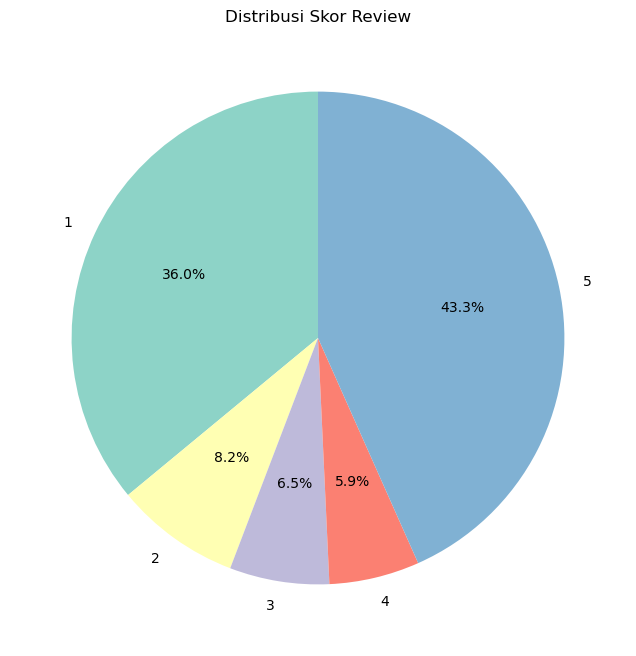

In [32]:
score_counts = df_new['score'].value_counts().sort_index()

# Membuat diagram pie
plt.figure(figsize=(8, 8))
plt.pie(
    score_counts,  # Menggunakan jumlah tiap kategori
    labels=score_counts.index,  # Label kategori
    autopct='%1.1f%%',  # Menampilkan persentase
    startangle=90,  # Mulai dari sudut 90 derajat
    colors=plt.cm.Set3.colors  # Warna otomatis
)
plt.title('Distribusi Skor Review')
plt.show()

##### Memotong Data menjadi 6 bulan terakhir

In [35]:
# Mengonversi kolom 'at' (tanggal ulasan) menjadi tipe data datetime 
df_new['at'] = pd.to_datetime(df_new['at']) 
df_new.head()

,reviewId,userName,content,score,at
0,cdd17ea1-754c-4b0a-9157-163d0c62b8dc,Pengguna Google,setiap kirim otp di sms /wa di imail saya g ada,5,2025-01-14 08:48:58
1,05338dcd-c3d6-45fc-99a9-21078161aeb3,Pengguna Google,Cakep,5,2025-01-14 08:26:24
2,ee18643f-dd39-41f0-82f8-90dee9465736,Pengguna Google,memuaskan,5,2025-01-14 08:16:42
3,cddcafd6-b750-4058-8e0e-805b3df78cc4,Pengguna Google,sangat membantu dalam bertransaksi,5,2025-01-14 08:03:46
4,d6e69de3-4b57-4aaa-b824-94f0b0ab2603,Pengguna Google,"kenapa ya sering banget kalo mau transfer, sel...",5,2025-01-14 07:58:19


In [37]:
#PENGGUNAAN DATA 6 Bulan terakhir 
start_date = '2024-07-05'
end_date = '2025-01-10'

In [39]:
# Memfilter ulasan berdasarkan rentang tanggal 
# Hanya ulasan dengan tanggal antara 'start_date' dan 'end_date' yang disertakan 
df = df_new[(df_new['at'] >= start_date) & (df_new['at'] <= end_date)] 

In [41]:
df

,reviewId,userName,content,score,at
156,d0677525-eead-45c2-ab2a-4f1c2b1833f2,Pengguna Google,Knpa ngk bisa buat transaksi m bangking,3,2025-01-09 23:41:12
157,864e0642-ee21-43a7-bc39-f22da89f690d,Pengguna Google,Selama pakai BNI mbanking semua serba mudah,5,2025-01-09 20:38:48
158,56ad8fb6-6420-4641-9535-25c86f69738b,Pengguna Google,"Mantab, sangat membantu",5,2025-01-09 20:32:41
159,dde042fa-e3df-4b7d-be46-b5798052b24b,Pengguna Google,"Kenapa kalo mau tf kok ada ""VASNAP 303"" gagal ...",4,2025-01-09 18:09:17
160,9617f6dd-80f9-45eb-bcb4-c7b78d7e6502,Pengguna Google,"Kenapa ga bisa beli token listrik, yaelah",1,2025-01-09 17:48:37
...,...,...,...,...,...
10040,842f1a47-6f83-409d-92f2-e840cdaa679d,Pengguna Google,Lebih bagus lagi.,5,2024-07-05 06:11:25
10041,ffb39a98-2893-4f3a-9e50-88bdb6df6c0a,Pengguna Google,Bagus sih cuma parah aja akhir2 ini gk bisa be...,3,2024-07-05 02:05:32
10042,bdf658c8-a6e7-4161-969e-5e3e9639ae40,Pengguna Google,"Daftar aja di persulit,masa baru daftar pas ma...",1,2024-07-05 01:48:45
10043,a4983796-d58d-4a77-a245-c850fb42a695,Pengguna Google,aplikasi nya bagus,5,2024-07-05 00:10:48


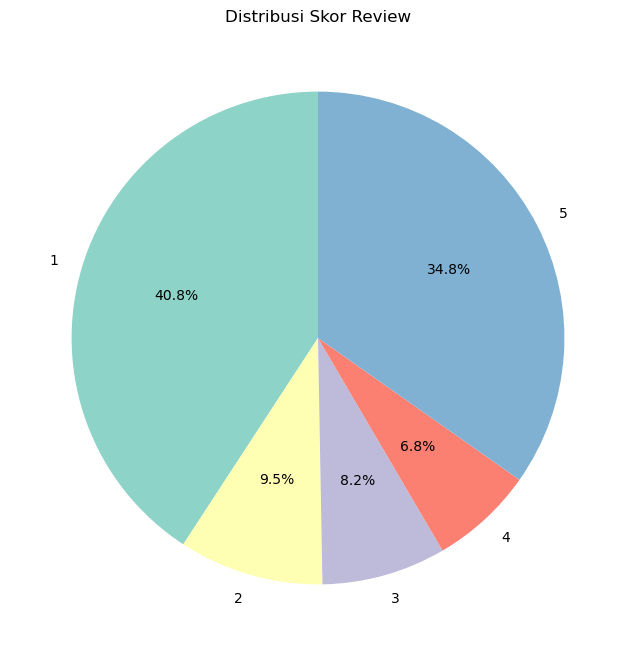

In [43]:
score_counts = df['score'].value_counts().sort_index()

# Membuat diagram pie
plt.figure(figsize=(8, 8))
plt.pie(
    score_counts,  # Menggunakan jumlah tiap kategori
    labels=score_counts.index,  # Label kategori
    autopct='%1.1f%%',  # Menampilkan persentase
    startangle=90,  # Mulai dari sudut 90 derajat
    colors=plt.cm.Set3.colors  # Warna otomatis
)
plt.title('Distribusi Skor Review')
plt.show()

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9889 entries, 156 to 10044
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   reviewId  9889 non-null   object        
 1   userName  9889 non-null   object        
 2   content   9889 non-null   object        
 3   score     9889 non-null   int64         
 4   at        9889 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 463.5+ KB


In [47]:
 df.to_csv("hasil_scraper_MBapp_6bulan.csv", index=False)

## **Pre-Processing**

In [49]:
data = pd.read_csv("hasil_scraper_MBapp_6bulan.csv")
data

,reviewId,userName,content,score,at
0,d0677525-eead-45c2-ab2a-4f1c2b1833f2,Pengguna Google,Knpa ngk bisa buat transaksi m bangking,3,2025-01-09 23:41:12
1,864e0642-ee21-43a7-bc39-f22da89f690d,Pengguna Google,Selama pakai BNI mbanking semua serba mudah,5,2025-01-09 20:38:48
2,56ad8fb6-6420-4641-9535-25c86f69738b,Pengguna Google,"Mantab, sangat membantu",5,2025-01-09 20:32:41
3,dde042fa-e3df-4b7d-be46-b5798052b24b,Pengguna Google,"Kenapa kalo mau tf kok ada ""VASNAP 303"" gagal ...",4,2025-01-09 18:09:17
4,9617f6dd-80f9-45eb-bcb4-c7b78d7e6502,Pengguna Google,"Kenapa ga bisa beli token listrik, yaelah",1,2025-01-09 17:48:37
...,...,...,...,...,...
9884,842f1a47-6f83-409d-92f2-e840cdaa679d,Pengguna Google,Lebih bagus lagi.,5,2024-07-05 06:11:25
9885,ffb39a98-2893-4f3a-9e50-88bdb6df6c0a,Pengguna Google,Bagus sih cuma parah aja akhir2 ini gk bisa be...,3,2024-07-05 02:05:32
9886,bdf658c8-a6e7-4161-969e-5e3e9639ae40,Pengguna Google,"Daftar aja di persulit,masa baru daftar pas ma...",1,2024-07-05 01:48:45
9887,a4983796-d58d-4a77-a245-c850fb42a695,Pengguna Google,aplikasi nya bagus,5,2024-07-05 00:10:48


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9889 entries, 0 to 9888
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reviewId  9889 non-null   object
 1   userName  9889 non-null   object
 2   content   9889 non-null   object
 3   score     9889 non-null   int64 
 4   at        9889 non-null   object
dtypes: int64(1), object(4)
memory usage: 386.4+ KB


#### *Hapus Duplikat pada content*

In [53]:
data.drop_duplicates(subset = "content", keep = 'first',inplace = True)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8497 entries, 0 to 9888
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reviewId  8497 non-null   object
 1   userName  8497 non-null   object
 2   content   8497 non-null   object
 3   score     8497 non-null   int64 
 4   at        8497 non-null   object
dtypes: int64(1), object(4)
memory usage: 398.3+ KB


#### *Cleaning Emoji, tanda, dll*

In [57]:
# Fungsi menghapus emotikon
def remove_emoji(text):
    if text is not None and isinstance(text, str):
        emoji_pattern = re.compile(
            u"[\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F700-\U0001F77F"  # alchemical symbols
            u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
            u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
            u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
            u"\U0001FA00-\U0001FA6F"  # Chess Symbols
            u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
            u"\U0001FC00-\U0001FCFF"  # Additional emoticons
            u"\U0001F1E0-\U0001F1FF"  # flags
            "]+", flags=re.UNICODE
        )
        return emoji_pattern.sub(r'', text)
    else:
        return text

# Fungsi untuk menghapus URL
def remove_URL(text):
    if text is not None and isinstance(text, str):
        url = re.compile(r'https?://\S+|www\.\S+')
        return url.sub(r'', text)
    else:
        return text

# Fungsi untuk menghapus HTML
def remove_html(text):
    if text is not None and isinstance(text, str):
        html = re.compile(r'<.*?>')
        return html.sub(r'', text)
    else:
        return text

# Fungsi untuk menghapus simbol
def remove_symbols(text):
    if text is not None and isinstance(text, str):
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

def remove_numbers(text):
    if text is not None and isinstance(text, str):
        text = re.sub(r'\d','', text)
    return text

In [59]:
data['cleaning'] = data['content'].apply(remove_emoji)
data['cleaning'] = data['cleaning'].apply(remove_URL)
data['cleaning'] = data['cleaning'].apply(remove_html)
data['cleaning'] = data['cleaning'].apply(remove_symbols)
data['cleaning'] = data['cleaning'].apply(remove_numbers)
data['cleaning'] = data['cleaning'].str.lower()

data.head(10)

,reviewId,userName,content,score,at,cleaning
0,d0677525-eead-45c2-ab2a-4f1c2b1833f2,Pengguna Google,Knpa ngk bisa buat transaksi m bangking,3,2025-01-09 23:41:12,knpa ngk bisa buat transaksi m bangking
1,864e0642-ee21-43a7-bc39-f22da89f690d,Pengguna Google,Selama pakai BNI mbanking semua serba mudah,5,2025-01-09 20:38:48,selama pakai bni mbanking semua serba mudah
2,56ad8fb6-6420-4641-9535-25c86f69738b,Pengguna Google,"Mantab, sangat membantu",5,2025-01-09 20:32:41,mantab sangat membantu
3,dde042fa-e3df-4b7d-be46-b5798052b24b,Pengguna Google,"Kenapa kalo mau tf kok ada ""VASNAP 303"" gagal ...",4,2025-01-09 18:09:17,kenapa kalo mau tf kok ada vasnap gagal membu...
4,9617f6dd-80f9-45eb-bcb4-c7b78d7e6502,Pengguna Google,"Kenapa ga bisa beli token listrik, yaelah",1,2025-01-09 17:48:37,kenapa ga bisa beli token listrik yaelah
5,c09d26fd-924b-4d9f-9d5f-39b097423252,Pengguna Google,Terima kasih BNI sudah sangat membantu dalam s...,5,2025-01-09 17:21:00,terima kasih bni sudah sangat membantu dalam s...
6,7f839b50-4d8f-4fd9-9452-cb65df0d4cf0,Pengguna Google,Praktis dan cepat dalam memberi pelayanan,5,2025-01-09 11:01:09,praktis dan cepat dalam memberi pelayanan
7,e5c6af0e-ec28-4c03-be73-6194a0f71270,Pengguna Google,masa waktu ambil uang dari atm uang saya gak k...,4,2025-01-09 10:23:04,masa waktu ambil uang dari atm uang saya gak k...
8,a944ffcf-5daa-4b75-b00d-062f804c6d10,Pengguna Google,Ini gimana ya konsepnya masok otp salah terus ...,1,2025-01-09 08:14:17,ini gimana ya konsepnya masok otp salah terus ...
9,31336c6d-a69f-44a5-ad45-ea9ab9ded899,Pengguna Google,Saya ubah ulasan saya Setiap saya buka Menu pe...,1,2025-01-09 08:08:00,saya ubah ulasan saya setiap saya buka menu pe...


#### *Pergantian kata jadi baku*

In [62]:
# Fungsi penggantian kata tidak baku
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
                #else
            else:
                replaced_words.append(word)
        replaced_text = ' '.join(replaced_words)
    else:
        replaced_text = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []
    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

In [64]:
#Kamus kata tidak baku
kamus_data = pd.read_excel("kamuskatabaku.xlsx")
kamus_tidak_baku = dict(zip(kamus_data['tidak_baku'],kamus_data['kata_baku']))

In [66]:
# Terapkan fungsi penggantian kata tidak baku
data['normalisasi'], data['Kata_Baku'], data['Kata_Tidak_Baku'], data['Kata_Tidak_Baku_Hash'] = zip(*data['cleaning'].apply(lambda x: replace_taboo_words(x, kamus_tidak_baku)))

# Tampilkan dataframe untuk memeriksa hasil
# Buat dataframe baru dengan kolom-kolom yang relevan
df = pd.DataFrame(data[['at', 'userName', 'score', 'content', 'cleaning', 'normalisasi']])
df.head(10)

,at,userName,score,content,cleaning,normalisasi
0,2025-01-09 23:41:12,Pengguna Google,3,Knpa ngk bisa buat transaksi m bangking,knpa ngk bisa buat transaksi m bangking,kenapa tidak bisa buat transaksi sama bangking
1,2025-01-09 20:38:48,Pengguna Google,5,Selama pakai BNI mbanking semua serba mudah,selama pakai bni mbanking semua serba mudah,selama pakai bni mbanking semua serba mudah
2,2025-01-09 20:32:41,Pengguna Google,5,"Mantab, sangat membantu",mantab sangat membantu,mantab sangat membantu
3,2025-01-09 18:09:17,Pengguna Google,4,"Kenapa kalo mau tf kok ada ""VASNAP 303"" gagal ...",kenapa kalo mau tf kok ada vasnap gagal membu...,kenapa kalau mau tf kok ada vasnap gagal membu...
4,2025-01-09 17:48:37,Pengguna Google,1,"Kenapa ga bisa beli token listrik, yaelah",kenapa ga bisa beli token listrik yaelah,kenapa tidak bisa beli token listrik yaelah
5,2025-01-09 17:21:00,Pengguna Google,5,Terima kasih BNI sudah sangat membantu dalam s...,terima kasih bni sudah sangat membantu dalam s...,terima kasih bni sudah sangat membantu dalam s...
6,2025-01-09 11:01:09,Pengguna Google,5,Praktis dan cepat dalam memberi pelayanan,praktis dan cepat dalam memberi pelayanan,praktis dan cepat dalam memberi pelayanan
7,2025-01-09 10:23:04,Pengguna Google,4,masa waktu ambil uang dari atm uang saya gak k...,masa waktu ambil uang dari atm uang saya gak k...,masa waktu ambil uang dari atm uang saya tidak...
8,2025-01-09 08:14:17,Pengguna Google,1,Ini gimana ya konsepnya masok otp salah terus ...,ini gimana ya konsepnya masok otp salah terus ...,ini bagaimana ya konsepnya masok otp salah ter...
9,2025-01-09 08:08:00,Pengguna Google,1,Saya ubah ulasan saya Setiap saya buka Menu pe...,saya ubah ulasan saya setiap saya buka menu pe...,saya ubah ulasan saya setiap saya buka menu pe...


#### *Tokenization*

In [68]:
def tokenize(text):
    tokens = text.split()
    return tokens

df['tokenized'] = df['normalisasi'].apply(tokenize)
df.head(10)

,at,userName,score,content,cleaning,normalisasi,tokenized
0,2025-01-09 23:41:12,Pengguna Google,3,Knpa ngk bisa buat transaksi m bangking,knpa ngk bisa buat transaksi m bangking,kenapa tidak bisa buat transaksi sama bangking,"[kenapa, tidak, bisa, buat, transaksi, sama, b..."
1,2025-01-09 20:38:48,Pengguna Google,5,Selama pakai BNI mbanking semua serba mudah,selama pakai bni mbanking semua serba mudah,selama pakai bni mbanking semua serba mudah,"[selama, pakai, bni, mbanking, semua, serba, m..."
2,2025-01-09 20:32:41,Pengguna Google,5,"Mantab, sangat membantu",mantab sangat membantu,mantab sangat membantu,"[mantab, sangat, membantu]"
3,2025-01-09 18:09:17,Pengguna Google,4,"Kenapa kalo mau tf kok ada ""VASNAP 303"" gagal ...",kenapa kalo mau tf kok ada vasnap gagal membu...,kenapa kalau mau tf kok ada vasnap gagal membu...,"[kenapa, kalau, mau, tf, kok, ada, vasnap, gag..."
4,2025-01-09 17:48:37,Pengguna Google,1,"Kenapa ga bisa beli token listrik, yaelah",kenapa ga bisa beli token listrik yaelah,kenapa tidak bisa beli token listrik yaelah,"[kenapa, tidak, bisa, beli, token, listrik, ya..."
5,2025-01-09 17:21:00,Pengguna Google,5,Terima kasih BNI sudah sangat membantu dalam s...,terima kasih bni sudah sangat membantu dalam s...,terima kasih bni sudah sangat membantu dalam s...,"[terima, kasih, bni, sudah, sangat, membantu, ..."
6,2025-01-09 11:01:09,Pengguna Google,5,Praktis dan cepat dalam memberi pelayanan,praktis dan cepat dalam memberi pelayanan,praktis dan cepat dalam memberi pelayanan,"[praktis, dan, cepat, dalam, memberi, pelayanan]"
7,2025-01-09 10:23:04,Pengguna Google,4,masa waktu ambil uang dari atm uang saya gak k...,masa waktu ambil uang dari atm uang saya gak k...,masa waktu ambil uang dari atm uang saya tidak...,"[masa, waktu, ambil, uang, dari, atm, uang, sa..."
8,2025-01-09 08:14:17,Pengguna Google,1,Ini gimana ya konsepnya masok otp salah terus ...,ini gimana ya konsepnya masok otp salah terus ...,ini bagaimana ya konsepnya masok otp salah ter...,"[ini, bagaimana, ya, konsepnya, masok, otp, sa..."
9,2025-01-09 08:08:00,Pengguna Google,1,Saya ubah ulasan saya Setiap saya buka Menu pe...,saya ubah ulasan saya setiap saya buka menu pe...,saya ubah ulasan saya setiap saya buka menu pe...,"[saya, ubah, ulasan, saya, setiap, saya, buka,..."


#### *Proses STOPWORD Remove*

In [70]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import STOPWORDS

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\IQBAL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [72]:
# Fungsi menghapus stopwords
stop_words = stopwords.words('indonesian')
custom_stopwords = {'ya'}
all_stopwords = set(stop_words).union(custom_stopwords)
all_stopwords.discard('baik')

def remove_stopword(tokens):
    return [word for word in tokens if word.lower() not in all_stopwords]

In [74]:
df['stopword_remove'] = df['tokenized'].apply(lambda x: remove_stopword(x))
df.head(5)

,at,userName,score,content,cleaning,normalisasi,tokenized,stopword_remove
0,2025-01-09 23:41:12,Pengguna Google,3,Knpa ngk bisa buat transaksi m bangking,knpa ngk bisa buat transaksi m bangking,kenapa tidak bisa buat transaksi sama bangking,"[kenapa, tidak, bisa, buat, transaksi, sama, b...","[transaksi, bangking]"
1,2025-01-09 20:38:48,Pengguna Google,5,Selama pakai BNI mbanking semua serba mudah,selama pakai bni mbanking semua serba mudah,selama pakai bni mbanking semua serba mudah,"[selama, pakai, bni, mbanking, semua, serba, m...","[pakai, bni, mbanking, serba, mudah]"
2,2025-01-09 20:32:41,Pengguna Google,5,"Mantab, sangat membantu",mantab sangat membantu,mantab sangat membantu,"[mantab, sangat, membantu]","[mantab, membantu]"
3,2025-01-09 18:09:17,Pengguna Google,4,"Kenapa kalo mau tf kok ada ""VASNAP 303"" gagal ...",kenapa kalo mau tf kok ada vasnap gagal membu...,kenapa kalau mau tf kok ada vasnap gagal membu...,"[kenapa, kalau, mau, tf, kok, ada, vasnap, gag...","[tf, vasnap, gagal, virtual, account]"
4,2025-01-09 17:48:37,Pengguna Google,1,"Kenapa ga bisa beli token listrik, yaelah",kenapa ga bisa beli token listrik yaelah,kenapa tidak bisa beli token listrik yaelah,"[kenapa, tidak, bisa, beli, token, listrik, ya...","[beli, token, listrik, yaelah]"


#### *Steaming*

In [98]:
#!pip install Sastrawi

In [76]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud, STOPWORDS

In [78]:
# Membuat objek stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk stemming teks
def stem_text(text):
    return [stemmer.stem(word) for word in text]

# Menerapkan stemming pada kolom 'stopword removal'
df['steming_data'] = df['stopword_remove'].apply(lambda x: ' '.join(stem_text(x)))
df.head(5)

,at,userName,score,content,cleaning,normalisasi,tokenized,stopword_remove,steming_data
0,2025-01-09 23:41:12,Pengguna Google,3,Knpa ngk bisa buat transaksi m bangking,knpa ngk bisa buat transaksi m bangking,kenapa tidak bisa buat transaksi sama bangking,"[kenapa, tidak, bisa, buat, transaksi, sama, b...","[transaksi, bangking]",transaksi bangking
1,2025-01-09 20:38:48,Pengguna Google,5,Selama pakai BNI mbanking semua serba mudah,selama pakai bni mbanking semua serba mudah,selama pakai bni mbanking semua serba mudah,"[selama, pakai, bni, mbanking, semua, serba, m...","[pakai, bni, mbanking, serba, mudah]",pakai bni mbanking serba mudah
2,2025-01-09 20:32:41,Pengguna Google,5,"Mantab, sangat membantu",mantab sangat membantu,mantab sangat membantu,"[mantab, sangat, membantu]","[mantab, membantu]",mantab bantu
3,2025-01-09 18:09:17,Pengguna Google,4,"Kenapa kalo mau tf kok ada ""VASNAP 303"" gagal ...",kenapa kalo mau tf kok ada vasnap gagal membu...,kenapa kalau mau tf kok ada vasnap gagal membu...,"[kenapa, kalau, mau, tf, kok, ada, vasnap, gag...","[tf, vasnap, gagal, virtual, account]",tf vasnap gagal virtual account
4,2025-01-09 17:48:37,Pengguna Google,1,"Kenapa ga bisa beli token listrik, yaelah",kenapa ga bisa beli token listrik yaelah,kenapa tidak bisa beli token listrik yaelah,"[kenapa, tidak, bisa, beli, token, listrik, ya...","[beli, token, listrik, yaelah]",beli token listrik yaelah


In [79]:
df.to_csv("hasil_cleaning_MBapp_6bulan.csv", index=False)

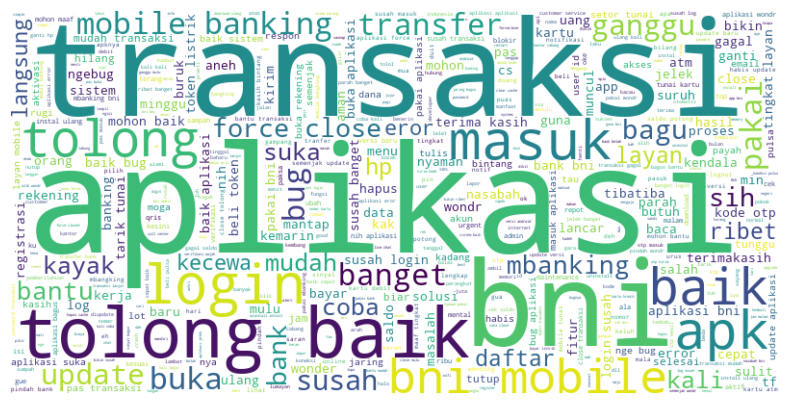

In [82]:
# Menggabungkan teks dari kolom 'Review Text'
text = ' '.join(df['steming_data'].astype(str).tolist())

custom_stopwords = set(STOPWORDS)
custom_stopwords.add('ya')

# Membuat WordCloud
wc = WordCloud(
    background_color="white",
    max_words=500,
    width=800,
    height=400,
    stopwords=custom_stopwords
).generate(text)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## **Labeling Data**

In [86]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("hasil_cleaning_MBapp_6bulan.csv")
df

,at,userName,score,content,cleaning,normalisasi,tokenized,stopword_remove,steming_data
0,2025-01-09 23:41:12,Pengguna Google,3,Knpa ngk bisa buat transaksi m bangking,knpa ngk bisa buat transaksi m bangking,kenapa tidak bisa buat transaksi sama bangking,"['kenapa', 'tidak', 'bisa', 'buat', 'transaksi...","['transaksi', 'bangking']",transaksi bangking
1,2025-01-09 20:38:48,Pengguna Google,5,Selama pakai BNI mbanking semua serba mudah,selama pakai bni mbanking semua serba mudah,selama pakai bni mbanking semua serba mudah,"['selama', 'pakai', 'bni', 'mbanking', 'semua'...","['pakai', 'bni', 'mbanking', 'serba', 'mudah']",pakai bni mbanking serba mudah
2,2025-01-09 20:32:41,Pengguna Google,5,"Mantab, sangat membantu",mantab sangat membantu,mantab sangat membantu,"['mantab', 'sangat', 'membantu']","['mantab', 'membantu']",mantab bantu
3,2025-01-09 18:09:17,Pengguna Google,4,"Kenapa kalo mau tf kok ada ""VASNAP 303"" gagal ...",kenapa kalo mau tf kok ada vasnap gagal membu...,kenapa kalau mau tf kok ada vasnap gagal membu...,"['kenapa', 'kalau', 'mau', 'tf', 'kok', 'ada',...","['tf', 'vasnap', 'gagal', 'virtual', 'account']",tf vasnap gagal virtual account
4,2025-01-09 17:48:37,Pengguna Google,1,"Kenapa ga bisa beli token listrik, yaelah",kenapa ga bisa beli token listrik yaelah,kenapa tidak bisa beli token listrik yaelah,"['kenapa', 'tidak', 'bisa', 'beli', 'token', '...","['beli', 'token', 'listrik', 'yaelah']",beli token listrik yaelah
...,...,...,...,...,...,...,...,...,...
8492,2024-07-05 06:11:25,Pengguna Google,5,Lebih bagus lagi.,lebih bagus lagi,lebih bagus lagi,"['lebih', 'bagus', 'lagi']",['bagus'],bagus
8493,2024-07-05 02:05:32,Pengguna Google,3,Bagus sih cuma parah aja akhir2 ini gk bisa be...,bagus sih cuma parah aja akhir ini gk bisa ber...,bagus sih cuma parah saja akhir ini tidak bisa...,"['bagus', 'sih', 'cuma', 'parah', 'saja', 'akh...","['bagus', 'sih', 'parah', 'bertransaksi', 'jam...",bagus sih parah transaksi jam malam dar transfer
8494,2024-07-05 01:48:45,Pengguna Google,1,"Daftar aja di persulit,masa baru daftar pas ma...",daftar aja di persulitmasa baru daftar pas mau...,daftar saja di persulitmasa baru daftar pas ma...,"['daftar', 'saja', 'di', 'persulitmasa', 'baru...","['daftar', 'persulitmasa', 'daftar', 'pas', 'n...",daftar persulitmasa daftar pas ngisi data suru...
8495,2024-07-05 00:10:48,Pengguna Google,5,aplikasi nya bagus,aplikasi nya bagus,aplikasi ya bagus,"['aplikasi', 'ya', 'bagus']","['aplikasi', 'bagus']",aplikasi bagus


In [9]:
df = df.dropna(subset=['steming_data'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8422 entries, 0 to 8496
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   at               8422 non-null   object
 1   userName         8422 non-null   object
 2   score            8422 non-null   int64 
 3   content          8422 non-null   object
 4   cleaning         8422 non-null   object
 5   normalisasi      8422 non-null   object
 6   tokenized        8422 non-null   object
 7   stopword_remove  8422 non-null   object
 8   steming_data     8422 non-null   object
dtypes: int64(1), object(8)
memory usage: 658.0+ KB


In [15]:
import pandas as pd
from tqdm.auto import tqdm
tqdm.pandas()  # Inisialisasi tqdm untuk pandas

positive_lexicon = pd.read_csv("positive2.csv", header=0)
negative_lexicon = pd.read_csv("negative2.csv", header=0)

lexicon_dict = {word: 1 for word in positive_lexicon['word']}  # Bobot positif (+1)
lexicon_dict.update({word: -1 for word in negative_lexicon['word']})  # Bobot negatif (-1)

def weight_sentiment(text):
    words = text.split()  # Pisahkan kata-kata dalam teks
    sentiment = sum([lexicon_dict.get(word, 0) for word in words])  # Hitung bobot
    return sentiment

# Terapkan fungsi ke kolom 'steming_data' menggunakan progress_apply
df.loc[:, "weight"] = df["steming_data"].progress_apply(weight_sentiment)

  0%|          | 0/8422 [00:00<?, ?it/s]

C:\Users\IQBAL\AppData\Local\Temp\ipykernel_28640\1051278441.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "weight"] = df["steming_data"].progress_apply(weight_sentiment)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8422 entries, 0 to 8496
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   at               8422 non-null   object
 1   userName         8422 non-null   object
 2   score            8422 non-null   int64 
 3   content          8422 non-null   object
 4   cleaning         8422 non-null   object
 5   normalisasi      8422 non-null   object
 6   tokenized        8422 non-null   object
 7   stopword_remove  8422 non-null   object
 8   steming_data     8422 non-null   object
 9   weight           8422 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 723.8+ KB


In [19]:
df.head()

,at,userName,score,content,cleaning,normalisasi,tokenized,stopword_remove,steming_data,weight
0,2025-01-09 23:41:12,Pengguna Google,3,Knpa ngk bisa buat transaksi m bangking,knpa ngk bisa buat transaksi m bangking,kenapa tidak bisa buat transaksi sama bangking,"['kenapa', 'tidak', 'bisa', 'buat', 'transaksi...","['transaksi', 'bangking']",transaksi bangking,1
1,2025-01-09 20:38:48,Pengguna Google,5,Selama pakai BNI mbanking semua serba mudah,selama pakai bni mbanking semua serba mudah,selama pakai bni mbanking semua serba mudah,"['selama', 'pakai', 'bni', 'mbanking', 'semua'...","['pakai', 'bni', 'mbanking', 'serba', 'mudah']",pakai bni mbanking serba mudah,2
2,2025-01-09 20:32:41,Pengguna Google,5,"Mantab, sangat membantu",mantab sangat membantu,mantab sangat membantu,"['mantab', 'sangat', 'membantu']","['mantab', 'membantu']",mantab bantu,2
3,2025-01-09 18:09:17,Pengguna Google,4,"Kenapa kalo mau tf kok ada ""VASNAP 303"" gagal ...",kenapa kalo mau tf kok ada vasnap gagal membu...,kenapa kalau mau tf kok ada vasnap gagal membu...,"['kenapa', 'kalau', 'mau', 'tf', 'kok', 'ada',...","['tf', 'vasnap', 'gagal', 'virtual', 'account']",tf vasnap gagal virtual account,-1
4,2025-01-09 17:48:37,Pengguna Google,1,"Kenapa ga bisa beli token listrik, yaelah",kenapa ga bisa beli token listrik yaelah,kenapa tidak bisa beli token listrik yaelah,"['kenapa', 'tidak', 'bisa', 'beli', 'token', '...","['beli', 'token', 'listrik', 'yaelah']",beli token listrik yaelah,0


In [21]:
# Classify into pos/neg
df['label'] = [
    "positive" if weight > 0 else 
    "negative" if weight < 0 else 
    "neutral"
    for weight in df['weight']
]

C:\Users\IQBAL\AppData\Local\Temp\ipykernel_28640\1061592993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = [


In [23]:
df = df[df["label"] != "neutral"]
df.reset_index(drop=True, inplace=True)

In [25]:
df['label'].value_counts()

label
positive    4733
negative    1877
Name: count, dtype: int64

In [27]:
df.head()

,at,userName,score,content,cleaning,normalisasi,tokenized,stopword_remove,steming_data,weight,label
0,2025-01-09 23:41:12,Pengguna Google,3,Knpa ngk bisa buat transaksi m bangking,knpa ngk bisa buat transaksi m bangking,kenapa tidak bisa buat transaksi sama bangking,"['kenapa', 'tidak', 'bisa', 'buat', 'transaksi...","['transaksi', 'bangking']",transaksi bangking,1,positive
1,2025-01-09 20:38:48,Pengguna Google,5,Selama pakai BNI mbanking semua serba mudah,selama pakai bni mbanking semua serba mudah,selama pakai bni mbanking semua serba mudah,"['selama', 'pakai', 'bni', 'mbanking', 'semua'...","['pakai', 'bni', 'mbanking', 'serba', 'mudah']",pakai bni mbanking serba mudah,2,positive
2,2025-01-09 20:32:41,Pengguna Google,5,"Mantab, sangat membantu",mantab sangat membantu,mantab sangat membantu,"['mantab', 'sangat', 'membantu']","['mantab', 'membantu']",mantab bantu,2,positive
3,2025-01-09 18:09:17,Pengguna Google,4,"Kenapa kalo mau tf kok ada ""VASNAP 303"" gagal ...",kenapa kalo mau tf kok ada vasnap gagal membu...,kenapa kalau mau tf kok ada vasnap gagal membu...,"['kenapa', 'kalau', 'mau', 'tf', 'kok', 'ada',...","['tf', 'vasnap', 'gagal', 'virtual', 'account']",tf vasnap gagal virtual account,-1,negative
4,2025-01-09 17:21:00,Pengguna Google,5,Terima kasih BNI sudah sangat membantu dalam s...,terima kasih bni sudah sangat membantu dalam s...,terima kasih bni sudah sangat membantu dalam s...,"['terima', 'kasih', 'bni', 'sudah', 'sangat', ...","['terima', 'kasih', 'bni', 'membantu', 'transa...",terima kasih bni bantu transaksi mudah mbankin...,5,positive


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6610 entries, 0 to 6609
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   at               6610 non-null   object
 1   userName         6610 non-null   object
 2   score            6610 non-null   int64 
 3   content          6610 non-null   object
 4   cleaning         6610 non-null   object
 5   normalisasi      6610 non-null   object
 6   tokenized        6610 non-null   object
 7   stopword_remove  6610 non-null   object
 8   steming_data     6610 non-null   object
 9   weight           6610 non-null   int64 
 10  label            6610 non-null   object
dtypes: int64(2), object(9)
memory usage: 568.2+ KB


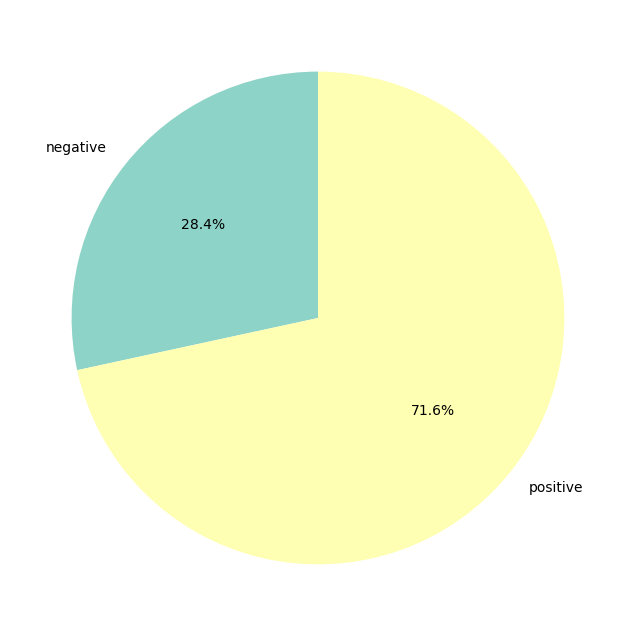

In [31]:
sentimen_counts = df['label'].value_counts().sort_index()

# Membuat diagram pie
plt.figure(figsize=(8, 8))
plt.pie(
    sentimen_counts,  # Menggunakan jumlah tiap kategori
    labels=sentimen_counts.index,  # Label kategori
    autopct='%1.1f%%',  # Menampilkan persentase
    startangle=90,  # Mulai dari sudut 90 derajat
    colors=plt.cm.Set3.colors  # Warna otomatis
)
plt.show()

In [35]:
df.to_csv("hasil_labeling_MB.csv", index=False)

### *Visualisasi WordCloud*


In [6]:
df = pd.read_csv("hasil_labeling_MB.csv")
df

,at,userName,score,content,cleaning,normalisasi,tokenized,stopword_remove,steming_data,weight,label
0,2025-01-09 23:41:12,Pengguna Google,3,Knpa ngk bisa buat transaksi m bangking,knpa ngk bisa buat transaksi m bangking,kenapa tidak bisa buat transaksi sama bangking,"['kenapa', 'tidak', 'bisa', 'buat', 'transaksi...","['transaksi', 'bangking']",transaksi bangking,1,positive
1,2025-01-09 20:38:48,Pengguna Google,5,Selama pakai BNI mbanking semua serba mudah,selama pakai bni mbanking semua serba mudah,selama pakai bni mbanking semua serba mudah,"['selama', 'pakai', 'bni', 'mbanking', 'semua'...","['pakai', 'bni', 'mbanking', 'serba', 'mudah']",pakai bni mbanking serba mudah,2,positive
2,2025-01-09 20:32:41,Pengguna Google,5,"Mantab, sangat membantu",mantab sangat membantu,mantab sangat membantu,"['mantab', 'sangat', 'membantu']","['mantab', 'membantu']",mantab bantu,2,positive
3,2025-01-09 18:09:17,Pengguna Google,4,"Kenapa kalo mau tf kok ada ""VASNAP 303"" gagal ...",kenapa kalo mau tf kok ada vasnap gagal membu...,kenapa kalau mau tf kok ada vasnap gagal membu...,"['kenapa', 'kalau', 'mau', 'tf', 'kok', 'ada',...","['tf', 'vasnap', 'gagal', 'virtual', 'account']",tf vasnap gagal virtual account,-1,negative
4,2025-01-09 17:21:00,Pengguna Google,5,Terima kasih BNI sudah sangat membantu dalam s...,terima kasih bni sudah sangat membantu dalam s...,terima kasih bni sudah sangat membantu dalam s...,"['terima', 'kasih', 'bni', 'sudah', 'sangat', ...","['terima', 'kasih', 'bni', 'membantu', 'transa...",terima kasih bni bantu transaksi mudah mbankin...,5,positive
...,...,...,...,...,...,...,...,...,...,...,...
6605,2024-07-05 08:53:58,Pengguna Google,5,Pertahankan udah nyaman pake ini,pertahankan udah nyaman pake ini,pertahankan sudah nyaman pakai ini,"['pertahankan', 'sudah', 'nyaman', 'pakai', 'i...","['pertahankan', 'nyaman', 'pakai']",tahan nyaman pakai,2,positive
6606,2024-07-05 08:12:02,Pengguna Google,2,Sayang banget mau ganti debit prakerja via app...,sayang banget mau ganti debit prakerja via app...,sayang banget mau ganti debit prakerja via app...,"['sayang', 'banget', 'mau', 'ganti', 'debit', ...","['sayang', 'banget', 'ganti', 'debit', 'praker...",sayang banget ganti debit prakerja via apps ka...,2,positive
6607,2024-07-05 06:11:25,Pengguna Google,5,Lebih bagus lagi.,lebih bagus lagi,lebih bagus lagi,"['lebih', 'bagus', 'lagi']",['bagus'],bagus,1,positive
6608,2024-07-05 01:48:45,Pengguna Google,1,"Daftar aja di persulit,masa baru daftar pas ma...",daftar aja di persulitmasa baru daftar pas mau...,daftar saja di persulitmasa baru daftar pas ma...,"['daftar', 'saja', 'di', 'persulitmasa', 'baru...","['daftar', 'persulitmasa', 'daftar', 'pas', 'n...",daftar persulitmasa daftar pas ngisi data suru...,-1,negative


In [12]:
def generate_wordcloud(data, ngram=(1,1), title='Word Cloud'):
    vectorizer = CountVectorizer(ngram_range=ngram)
    X = vectorizer.fit_transform(data)

    sum_words = X.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    word_freq_dict = dict(words_freq[:50])
    
    hapus_kata = ['aplikasi', 'bni', 'wondr', 'by']

    # Hapus semua kata dalam list hapus_kata
    for kata in hapus_kata:
        word_freq_dict.pop(kata, None)

    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          colormap='viridis').generate_from_frequencies(word_freq_dict)

    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

### *UniGram*

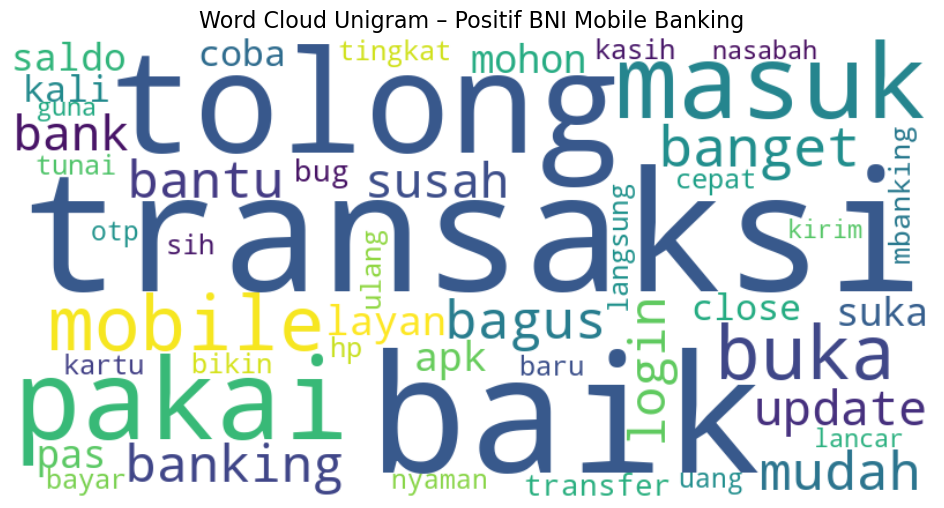

In [14]:
positif_reviews = df[df['label'] == 'positive']['steming_data']
generate_wordcloud(positif_reviews, ngram=(1,1), title='Word Cloud Unigram – Positif BNI Mobile Banking')

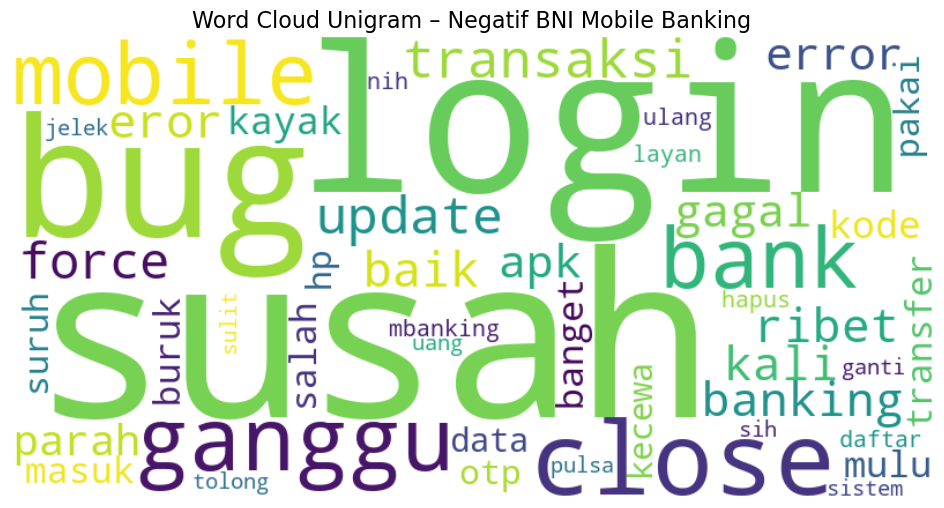

In [16]:
negatif_reviews = df[df['label'] == 'negative']['steming_data']
generate_wordcloud(negatif_reviews, ngram=(1,1), title='Word Cloud Unigram – Negatif BNI Mobile Banking')

### *BiGram*

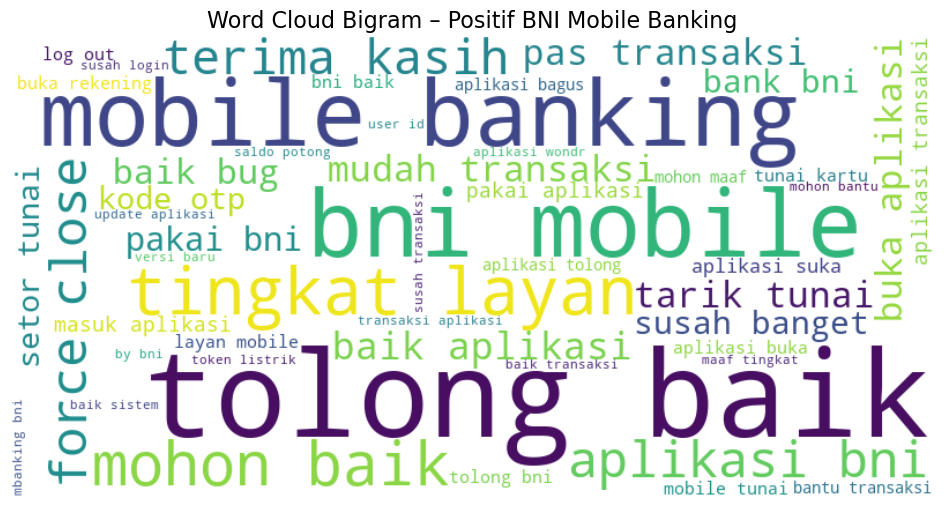

In [18]:
generate_wordcloud(positif_reviews, ngram=(2,2), title='Word Cloud Bigram – Positif BNI Mobile Banking')

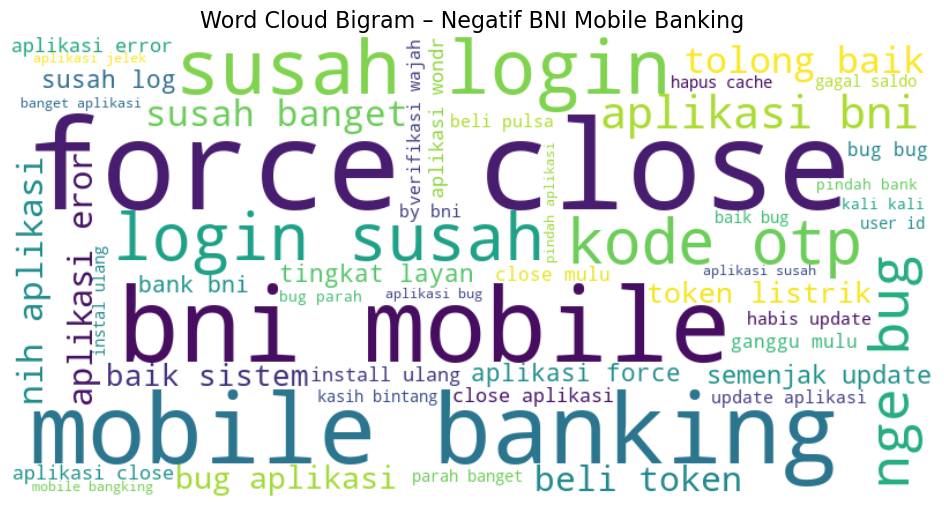

In [20]:
generate_wordcloud(negatif_reviews, ngram=(2,2), title='Word Cloud Bigram – Negatif BNI Mobile Banking')

## **Modelling**

### TFIDF

In [5]:
df = pd.read_csv("hasil_labeling_MB.csv")
df

,at,userName,score,content,cleaning,normalisasi,tokenized,stopword_remove,steming_data,weight,label
0,2025-01-09 23:41:12,Pengguna Google,3,Knpa ngk bisa buat transaksi m bangking,knpa ngk bisa buat transaksi m bangking,kenapa tidak bisa buat transaksi sama bangking,"['kenapa', 'tidak', 'bisa', 'buat', 'transaksi...","['transaksi', 'bangking']",transaksi bangking,1,positive
1,2025-01-09 20:38:48,Pengguna Google,5,Selama pakai BNI mbanking semua serba mudah,selama pakai bni mbanking semua serba mudah,selama pakai bni mbanking semua serba mudah,"['selama', 'pakai', 'bni', 'mbanking', 'semua'...","['pakai', 'bni', 'mbanking', 'serba', 'mudah']",pakai bni mbanking serba mudah,2,positive
2,2025-01-09 20:32:41,Pengguna Google,5,"Mantab, sangat membantu",mantab sangat membantu,mantab sangat membantu,"['mantab', 'sangat', 'membantu']","['mantab', 'membantu']",mantab bantu,2,positive
3,2025-01-09 18:09:17,Pengguna Google,4,"Kenapa kalo mau tf kok ada ""VASNAP 303"" gagal ...",kenapa kalo mau tf kok ada vasnap gagal membu...,kenapa kalau mau tf kok ada vasnap gagal membu...,"['kenapa', 'kalau', 'mau', 'tf', 'kok', 'ada',...","['tf', 'vasnap', 'gagal', 'virtual', 'account']",tf vasnap gagal virtual account,-1,negative
4,2025-01-09 17:21:00,Pengguna Google,5,Terima kasih BNI sudah sangat membantu dalam s...,terima kasih bni sudah sangat membantu dalam s...,terima kasih bni sudah sangat membantu dalam s...,"['terima', 'kasih', 'bni', 'sudah', 'sangat', ...","['terima', 'kasih', 'bni', 'membantu', 'transa...",terima kasih bni bantu transaksi mudah mbankin...,5,positive
...,...,...,...,...,...,...,...,...,...,...,...
6605,2024-07-05 08:53:58,Pengguna Google,5,Pertahankan udah nyaman pake ini,pertahankan udah nyaman pake ini,pertahankan sudah nyaman pakai ini,"['pertahankan', 'sudah', 'nyaman', 'pakai', 'i...","['pertahankan', 'nyaman', 'pakai']",tahan nyaman pakai,2,positive
6606,2024-07-05 08:12:02,Pengguna Google,2,Sayang banget mau ganti debit prakerja via app...,sayang banget mau ganti debit prakerja via app...,sayang banget mau ganti debit prakerja via app...,"['sayang', 'banget', 'mau', 'ganti', 'debit', ...","['sayang', 'banget', 'ganti', 'debit', 'praker...",sayang banget ganti debit prakerja via apps ka...,2,positive
6607,2024-07-05 06:11:25,Pengguna Google,5,Lebih bagus lagi.,lebih bagus lagi,lebih bagus lagi,"['lebih', 'bagus', 'lagi']",['bagus'],bagus,1,positive
6608,2024-07-05 01:48:45,Pengguna Google,1,"Daftar aja di persulit,masa baru daftar pas ma...",daftar aja di persulitmasa baru daftar pas mau...,daftar saja di persulitmasa baru daftar pas ma...,"['daftar', 'saja', 'di', 'persulitmasa', 'baru...","['daftar', 'persulitmasa', 'daftar', 'pas', 'n...",daftar persulitmasa daftar pas ngisi data suru...,-1,negative


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [9]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df["steming_data"])
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5288, 5726), (1322, 5726), (5288,), (1322,))

### Naive Bayes

In [11]:
# Hitung prior dari distribusi label
p_positive = df["label"].value_counts(normalize=True)["positive"]
p_negative = df["label"].value_counts(normalize=True)["negative"]

In [13]:
# Model Naive Bayes
nb = MultinomialNB(class_prior=[p_negative, p_positive])

# Grid parameter yang akan diuji
param_grid = {
    "alpha": np.linspace(0.01, 5, 20)  # Rentang smoothing
}

grid_search = GridSearchCV(nb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Menampilkan hasil terbaik
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best parameters: {'alpha': 0.27263157894736845}
Best accuracy: 0.8611936267890898


In [15]:
y_pred = grid_search.best_estimator_.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8661119515885023
Classification Report:
               precision    recall  f1-score   support

    negative       0.92      0.56      0.70       365
    positive       0.85      0.98      0.91       957

    accuracy                           0.87      1322
   macro avg       0.89      0.77      0.81      1322
weighted avg       0.87      0.87      0.85      1322

Confusion Matrix:
 [[205 160]
 [ 17 940]]


### SVM

In [17]:
svm = SVC()

param_grid = {
    "C": np.logspace(-3,3,7),  # Regularisasi
    "kernel": ["linear", "rbf"],  # Jenis kernel
    "gamma": np.logspace(-3,3,7)  # Parameter kernel RBF
}


grid_search2 = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search2.fit(X_train, y_train)

print("Best parameters:", grid_search2.best_params_)
print("Best accuracy (CV score):", grid_search2.best_score_)

Best parameters: {'C': 1000.0, 'gamma': 0.01, 'kernel': 'rbf'}
Best accuracy (CV score): 0.9778745710029277


In [19]:
y_pred2 = grid_search2.best_estimator_.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Classification Report:\n", classification_report(y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))

Accuracy: 0.9856278366111951
Classification Report:
               precision    recall  f1-score   support

    negative       0.98      0.96      0.97       365
    positive       0.99      0.99      0.99       957

    accuracy                           0.99      1322
   macro avg       0.98      0.98      0.98      1322
weighted avg       0.99      0.99      0.99      1322

Confusion Matrix:
 [[352  13]
 [  6 951]]
